<a href="https://colab.research.google.com/github/rizkyarif12/PCVK_Ganjil_2024/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Week 6

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

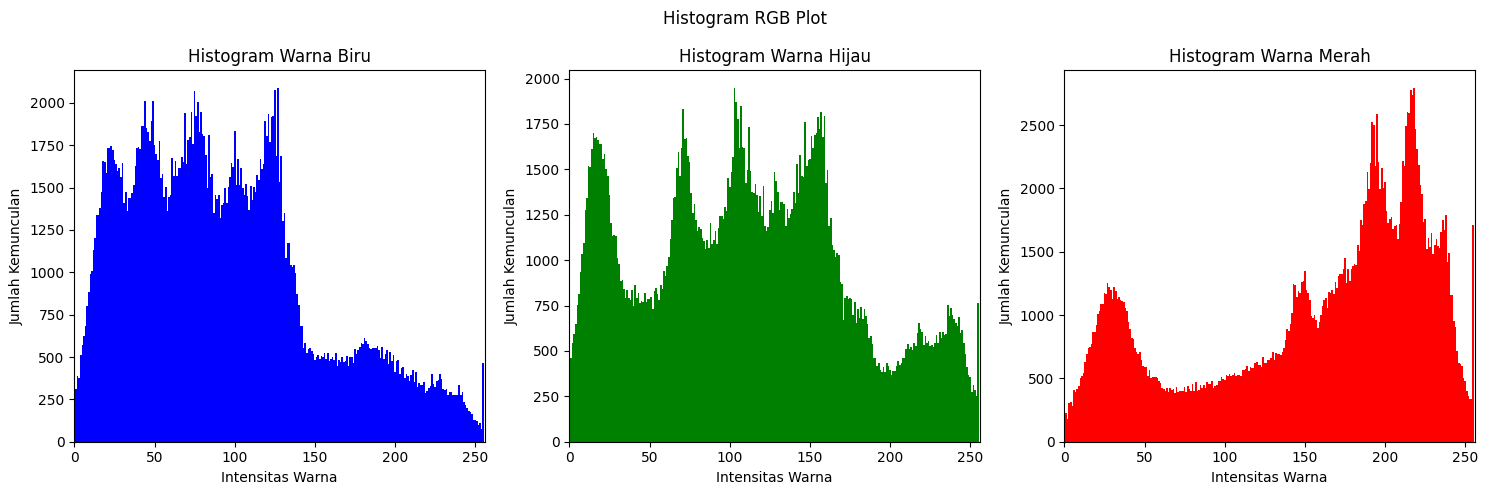

In [9]:
image_path = '/content/drive/MyDrive/AssetsPCVK/Assets/lena.jpg'  # Ganti dengan path citra Anda
image = cv.imread(image_path)

# Kanal warna
plt.figure(figsize=(15, 5))

# Kanal warna
colors = ('b', 'g', 'r')
color_names = ('Biru', 'Hijau', 'Merah')

# Membuat subplot untuk masing-masing kanal warna dengan bar
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    hist = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.bar(np.arange(256), hist.flatten(), color=color, width=1.0)
    plt.title(f'Histogram Warna {color_names[i]}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

# Menampilkan plot
plt.suptitle('Histogram RGB Plot')
plt.tight_layout()
plt.show()

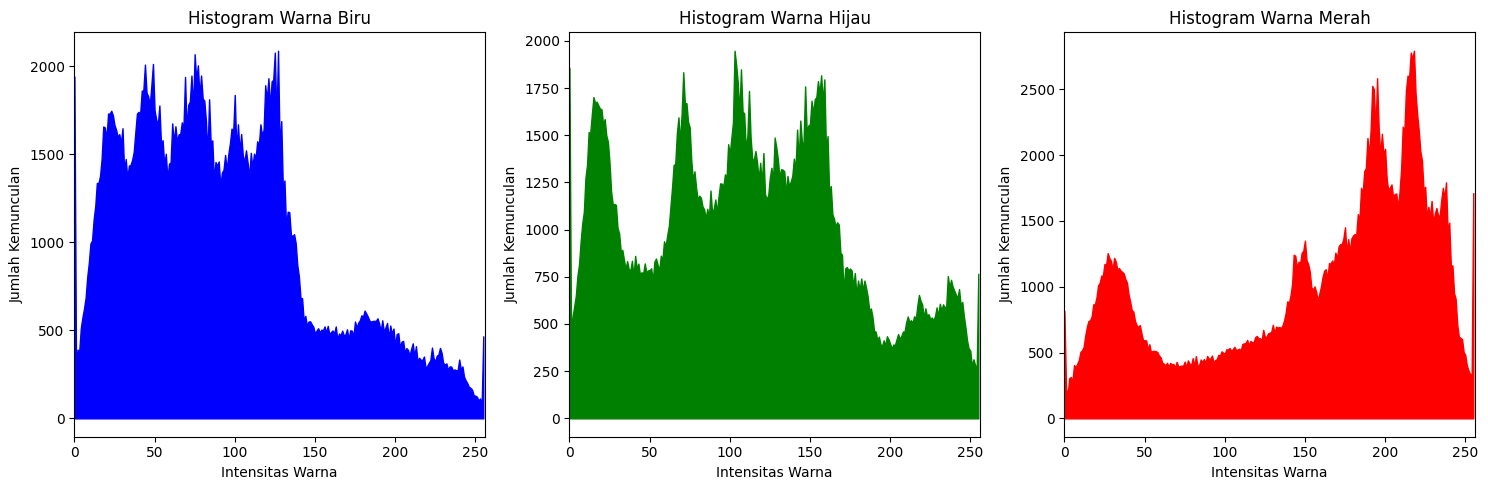

In [18]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 5))

# Kanal warna
colors = ('b', 'g', 'r')
color_names = ('Biru', 'Hijau', 'Merah')

# Membuat subplot untuk masing-masing kanal warna
for i, (color, color_name) in enumerate(zip(colors, color_names)):
    # Memisahkan kanal warna
    channel = image[:, :, i]

    # Menghitung histogram menggunakan NumPy
    hist, bins = np.histogram(channel, bins=256, range=[0, 256])

    # Plot histogram
    plt.subplot(1, 3, i + 1)
    plt.fill_between(bins[:-1], hist, color=color)
    plt.title(f'Histogram Warna {color_name}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

# Menampilkan plot
plt.tight_layout()
plt.show()

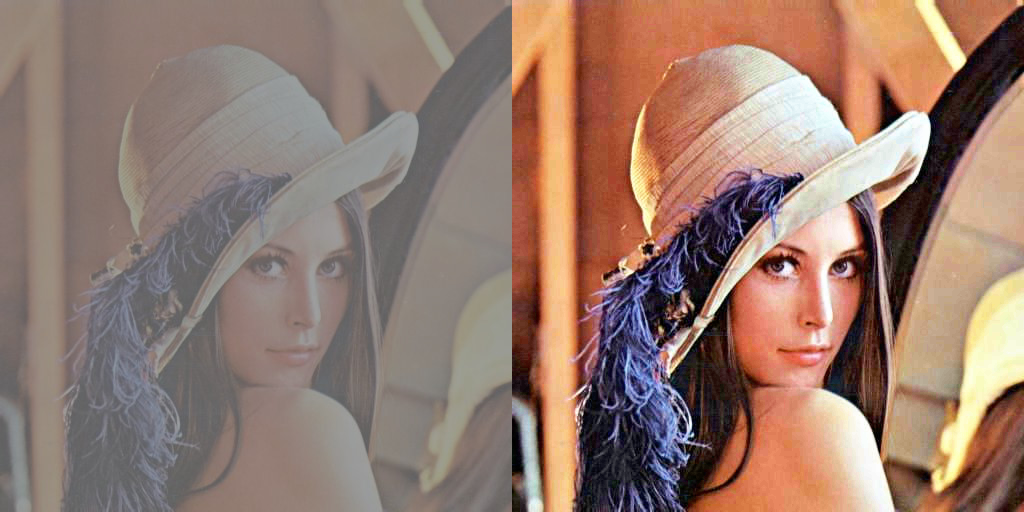

<BarContainer object of 256 artists>

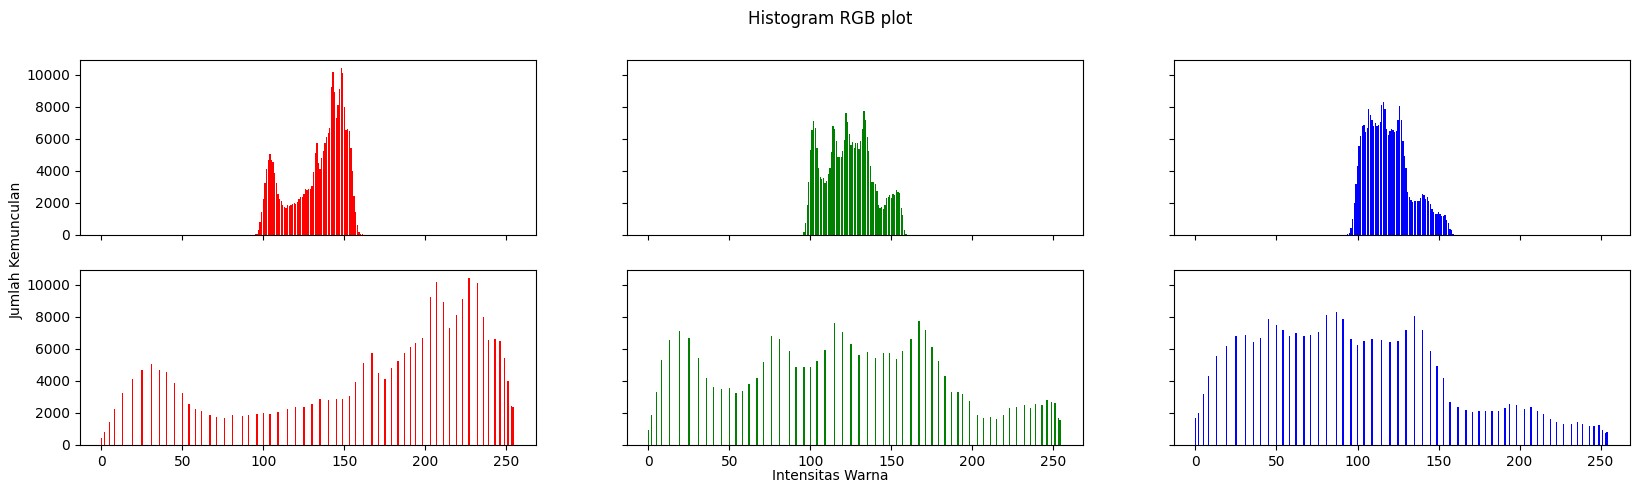

In [38]:
img1 = cv.imread('/content/drive/MyDrive/AssetsPCVK/Assets/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

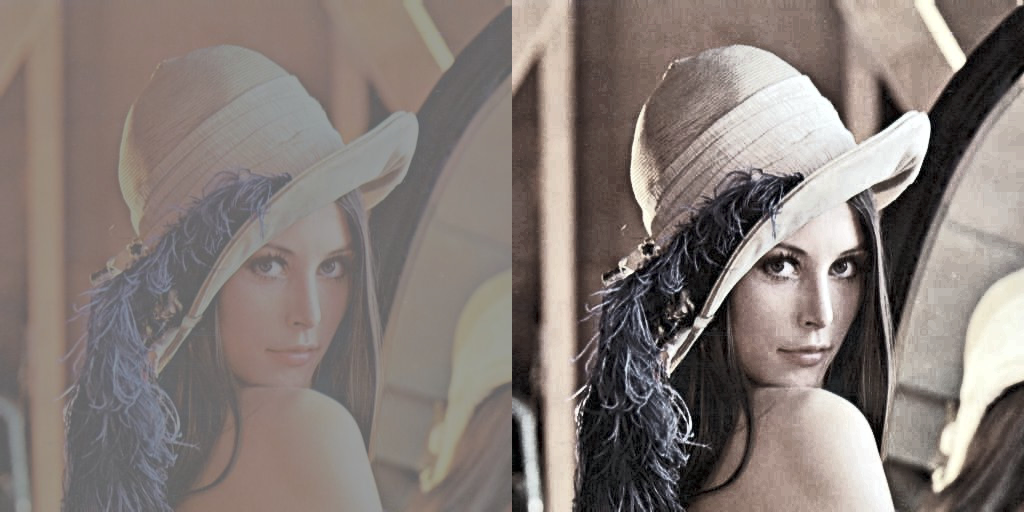

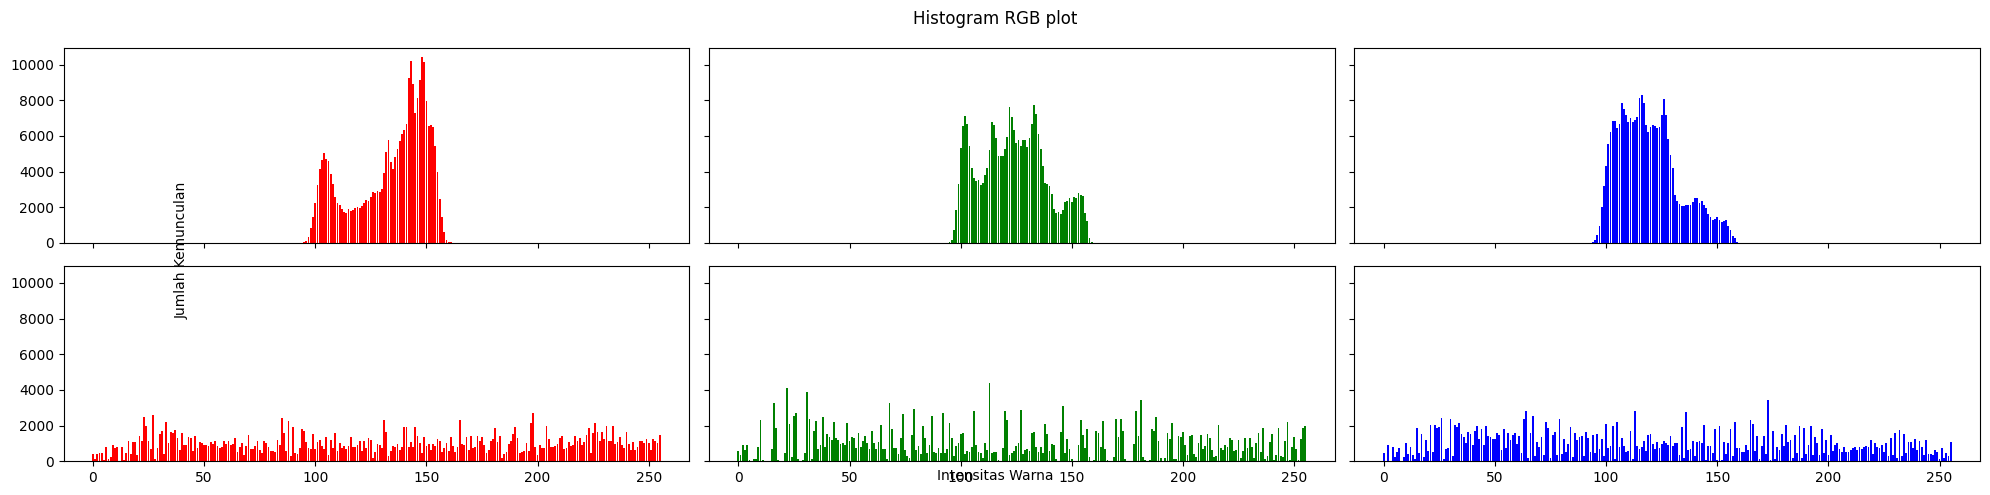

In [45]:
# Membaca citra
img1 = cv.imread('/content/drive/MyDrive/AssetsPCVK/Assets/lena_lc.jpg')

# Mengonversi citra ke format LAB untuk mengequalize hanya saluran L
# lab = cv.cvtColor(img1, cv.COLOR_BGR2LAB)

# Memisahkan saluran L, A, dan B
# l, a, b = cv.split(lab)

# Menggunakan fungsi equalizeHist untuk equalisasi histogram pada saluran L
# equalized_l = cv.equalizeHist(l)

# Menggabungkan kembali saluran yang telah di-equalize dengan saluran A dan B
# equalized_lab = cv.merge((equalized_l, a, b))

# Mengonversi kembali ke BGR
# img2 = cv.cvtColor(equalized_lab, cv.COLOR_LAB2BGR)

# Menghitung histogram untuk citra asli dan citra yang telah di-equalize
histo_asli = cv.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
equal_histo = cv.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Membuat frame akhir untuk menampilkan citra
final_frame = cv.hconcat((img1, img2))

# Menampilkan citra hasil
cv2_imshow(final_frame)

# Menampilkan histogram
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menghitung histogram untuk masing-masing saluran warna
histo_asli_red = cv.calcHist([img1], [2], None, [256], [0, 256])
histo_asli_green = cv.calcHist([img1], [1], None, [256], [0, 256])
histo_asli_blue = cv.calcHist([img1], [0], None, [256], [0, 256])

equal_histo_red = cv.calcHist([img2], [2], None, [256], [0, 256])
equal_histo_green = cv.calcHist([img2], [1], None, [256], [0, 256])
equal_histo_blue = cv.calcHist([img2], [0], None, [256], [0, 256])

# Menampilkan histogram untuk citra asli
axs[0, 0].bar(names, histo_asli_red.flatten(), color='red')
axs[0, 1].bar(names, histo_asli_green.flatten(), color='green')
axs[0, 2].bar(names, histo_asli_blue.flatten(), color='blue')

# Menampilkan histogram untuk citra yang telah di-equalize
axs[1, 0].bar(names, equal_histo_red.flatten(), color='red')
axs[1, 1].bar(names, equal_histo_green.flatten(), color='green')
axs[1, 2].bar(names, equal_histo_blue.flatten(), color='blue')

plt.tight_layout()
plt.show()